<a href="https://colab.research.google.com/github/Inventrohyder/death-app/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade -q gspread

In [2]:
# Authenticate the Google user
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [3]:
# Access the Google Sheet
worksheet = gc.open_by_key('1DFscs0MK6UhjHgnSXlmRWOSTpfLgb0KAYF5297V9NRg')
worksheet = worksheet.worksheet('Form Responses')
data = worksheet.get_all_values()

In [5]:
# Transform the Google Sheet data to a Pandas DataFrame
import pandas as pd
import numpy as np
df = pd.DataFrame(data[1:], columns=data[0])

# Clean the data
df = df.replace('',np.nan)
df = df.replace('N/A', np.nan)
for column in df.columns:
  df[column] = df[column].astype('float64', errors='ignore')
df.head()

,Timestamp,Agreement 同意,Have you prepared for your demise or when an accident occurs?,Have you prepared a will?,Do you update your will?,Do you have your convenient records of these ready? [ your assets],Do you have your convenient records of these ready? [your bank accounts info],Do you have your convenient records of these ready? [social media accounts],What (kind of) message would you like to leave behind? For whom?,What else have you done in preparation for your demise or an emergency?,"If you die right now, how well will things be taken care of? How much information do your loved ones and legal partners have to take care of things for you?",Have you lost a loved one recently?,When did you loose your loved one?,Was it an expected death?,Did they leave a will?,"If so, was it easy to find?",Did they leave messages — for you and other loved ones?,"If so, was it easy to have access?","Did they leave you relevant account information (social media, bank)?",What other information did you wish you have?,Age 年齡,What's your gender? 性別,Are you married? 你結婚了嗎？,How many kids do you have? 你有幾個小孩？
0,11/30/2020 13:04:52,I agree 我同意,No,No,No,No,Yes,Yes,“Listen To Florence Welch”. ~ my sister,I think about it rarely. But when I do I never...,5.0,Yes,Less than a month,Yes,No,NaN,No,NaN,No,NaN,19.0,Female 女性,No 否,0.0
1,11/30/2020 13:10:00,I agree 我同意,No,No,No,No,No,No,"Shit happens?\nIf something does happen, I'd l...",Nothing. I have told my family my bank account...,2.0,Yes,Less than a month,Somewhat,No,NaN,No,NaN,NaN,My grandpa kept all my grandma's info. \nMy gr...,23.0,Female 女性,No 否,0.0
2,11/30/2020 13:12:26,I agree 我同意,No,No,No,No,Yes,Yes,"Don't cry, to my loved ones",NO,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Female 女性,No 否,0.0
3,11/30/2020 13:35:34,I agree 我同意,No,No,No,Yes,Yes,No,NaN,NaN,5.0,Yes,1-6 months,Yes,No,NaN,No,NaN,Yes,NaN,23.0,Male 男性,No 否,0.0
4,11/30/2020 14:09:58,I agree 我同意,No,No,No,No,No,No,"My laptop. Family, Close Friends",no,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Female 女性,No 否,0.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24190 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20491 missing from current font.
  font.set_

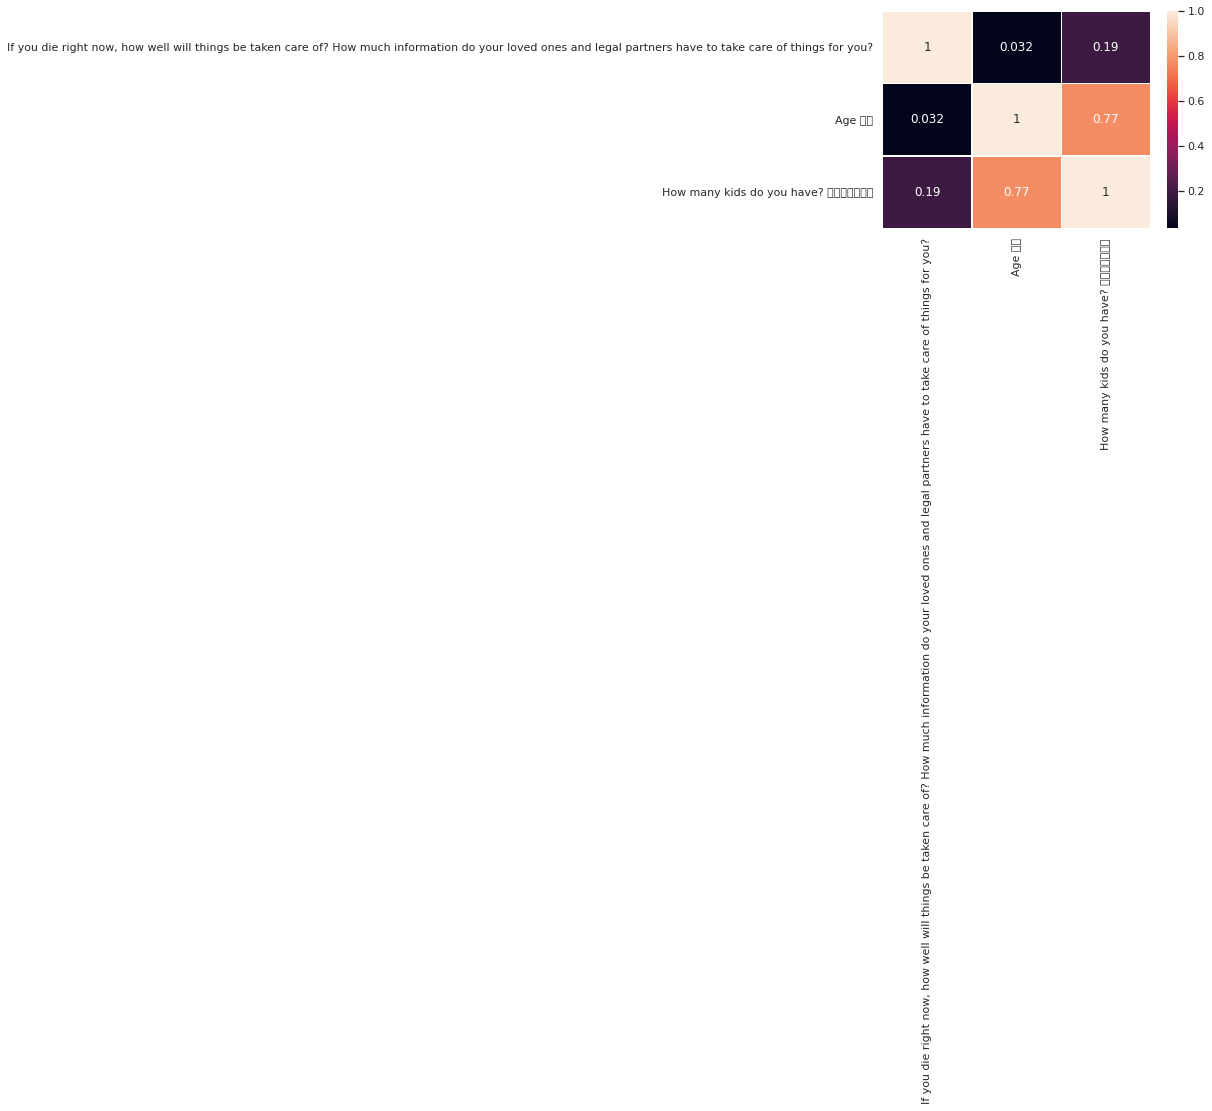

In [15]:
# Create correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
sns.heatmap(df.corr(), annot=True,linewidths=.5)

It makes sense that the *older* a person is, the *more kids* they have. (The positive correlation between age and kids). 

Second, the *younger* a person is, the *less prepared* they are for their passing. 

Finally, people with fewer kids seem to have less prepared for their passing. However, that might also be because the people who are younger are also the people who have fewer kids.

In [8]:
# Descriptive statistics
df.describe()

,"If you die right now, how well will things be taken care of? How much information do your loved ones and legal partners have to take care of things for you?",Age 年齡,How many kids do you have? 你有幾個小孩？
count,63.000000,63.000000,63.000000
mean,2.968254,35.111111,0.952381
std,1.230896,14.249065,1.169899
min,1.000000,17.000000,0.000000
25%,2.000000,21.000000,0.000000
50%,3.000000,35.000000,0.000000
75%,4.000000,47.000000,2.000000
max,5.000000,67.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80aab633c8>,
      dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text

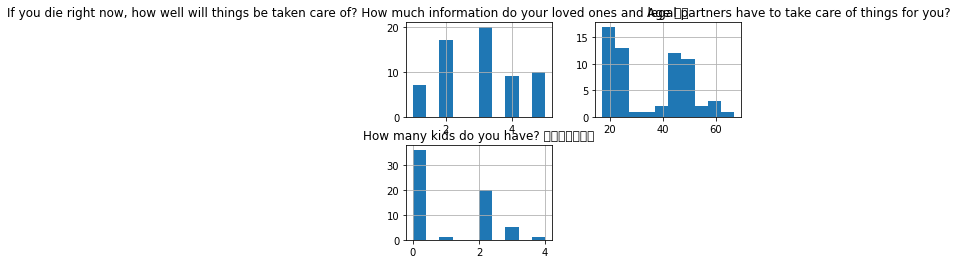

In [12]:
df.hist()